In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

df =  pd.DataFrame(pd.read_csv('ds/kc_house_data.csv')) # читаем csv
df["date"] = pd.to_datetime(df['date']) # форматируем дату
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [3]:
df = df[['date', 'price', 'yr_built', 'yr_renovated', 'sqft_living', 'condition']] # отбираем признаки по условию
df

date     price  yr_built  yr_renovated  sqft_living  condition
0     2014-10-13  221900.0      1955             0         1180          3
1     2014-12-09  538000.0      1951          1991         2570          3
2     2015-02-25  180000.0      1933             0          770          3
3     2014-12-09  604000.0      1965             0         1960          5
4     2015-02-18  510000.0      1987             0         1680          3
...          ...       ...       ...           ...          ...        ...
21608 2014-05-21  360000.0      2009             0         1530          3
21609 2015-02-23  400000.0      2014             0         2310          3
21610 2014-06-23  402101.0      2009             0         1020          3
21611 2015-01-16  400000.0      2004             0         1600          3
21612 2014-10-15  325000.0      2008             0         1020          3

[21613 rows x 6 columns]

In [4]:
df["real_year"] = df[["yr_built","yr_renovated"]].values.max(1) # вводим новый ст. равный максимуму из yr_built и yr_renovated
df.head()

date     price  yr_built  yr_renovated  sqft_living  condition  \
0 2014-10-13  221900.0      1955             0         1180          3   
1 2014-12-09  538000.0      1951          1991         2570          3   
2 2015-02-25  180000.0      1933             0          770          3   
3 2014-12-09  604000.0      1965             0         1960          5   
4 2015-02-18  510000.0      1987             0         1680          3   

   real_year  
0       1955  
1       1991  
2       1933  
3       1965  
4       1987

In [5]:
df = df.sort_values(by=['real_year', 'sqft_living', 'condition'])

In [6]:
#4 кол-й анализ real_year

df_ry = pd.DataFrame(df['real_year'].value_counts(ascending = True))
df_ry

real_year
1934         14
1935         19
1933         23
1902         25
1901         28
...         ...
2003        457
2004        459
2006        478
2005        485
2014        650

[116 rows x 1 columns]

In [7]:
df['count'] =  df.groupby('real_year', as_index=False)['real_year'].transform(lambda s: s.count())
df = df.sort_values(by='count')
df

date     price  yr_built  yr_renovated  sqft_living  condition  \
16073 2014-06-21  750000.0      1934             0         2610          3   
9502  2015-02-04  230000.0      1934             0          890          3   
15557 2015-03-11  230000.0      1934             0         1120          4   
6964  2015-04-29  272000.0      1934             0         1130          3   
3457  2014-12-10  345950.0      1934             0         1340          3   
...          ...       ...       ...           ...          ...        ...   
5775  2014-10-31  730000.0      2014             0         2160          3   
20137 2014-09-30  629000.0      2014             0         2160          3   
3521  2014-09-16  802000.0      2014             0         2170          3   
20083 2014-09-29  388000.0      2014             0         2090          3   
2275  2014-10-27  610000.0      1965          2014         1660          3   

       real_year  count  
16073       1934     14  
9502        1934     14  
15557       1934     14  
6964        1934     14  
3457        1934     14  
...          ...    ...  
5775        2014    650  
20137       2014    650  
3521        2014    650  
20083       2014    650  
2275        2014    650  

[21613 rows x 8 columns]

In [8]:
index = df_ry.index
arr = list(index)
newarr=arr[:+2]+arr[-2:]
newarr

[1934, 1935, 2005, 2014]

In [9]:
df.loc[df['real_year'].isin(newarr)] # останутся строки только с 4-мя реальными годами

date     price  yr_built  yr_renovated  sqft_living  condition  \
16073 2014-06-21  750000.0      1934             0         2610          3   
9502  2015-02-04  230000.0      1934             0          890          3   
15557 2015-03-11  230000.0      1934             0         1120          4   
6964  2015-04-29  272000.0      1934             0         1130          3   
3457  2014-12-10  345950.0      1934             0         1340          3   
...          ...       ...       ...           ...          ...        ...   
5775  2014-10-31  730000.0      2014             0         2160          3   
20137 2014-09-30  629000.0      2014             0         2160          3   
3521  2014-09-16  802000.0      2014             0         2170          3   
20083 2014-09-29  388000.0      2014             0         2090          3   
2275  2014-10-27  610000.0      1965          2014         1660          3   

       real_year  count  
16073       1934     14  
9502        1934     14  
15557       1934     14  
6964        1934     14  
3457        1934     14  
...          ...    ...  
5775        2014    650  
20137       2014    650  
3521        2014    650  
20083       2014    650  
2275        2014    650  

[1168 rows x 8 columns]

In [10]:
df = df.sort_values(by=['real_year', 'sqft_living', 'condition'])
df.loc[~df['real_year'].isin(newarr)] # Теперь остались все строки, кроме строк с годом из newarr 


date      price  yr_built  yr_renovated  sqft_living  condition  \
14001 2015-03-11   130000.0      1900             0          600          4   
8732  2015-03-17   382888.0      1900             0          620          3   
18780 2014-08-13   415000.0      1900             0          760          3   
14374 2014-07-01   600000.0      1900             0          910          3   
7849  2014-09-16   169900.0      1900             0          910          4   
...          ...        ...       ...           ...          ...        ...   
20488 2015-02-02  1289990.0      2015             0         4360          3   
8692  2015-05-06  1485000.0      1964          2015         4430          3   
21372 2014-05-20   490000.0      2015             0         4460          3   
14859 2014-06-06   805000.0      1956          2015         4600          3   
21333 2015-05-08  1999950.0      2015             0         5640          3   

       real_year  count  
14001       1900     68  
8732        1900     68  
18780       1900     68  
14374       1900     68  
7849        1900     68  
...          ...    ...  
20488       2015     54  
8692        2015     54  
21372       2015     54  
14859       2015     54  
21333       2015     54  

[20445 rows x 8 columns]

In [11]:
# [7-10] below

In [12]:
df_cond = pd.DataFrame(df['condition'].value_counts())
df_cond
# кол-й анализ condition

condition
3      14031
4       5679
5       1701
2        172
1         30

In [13]:
#8 нормализация 

In [14]:
df8 = pd.DataFrame(pd.concat([df['real_year'],df['condition']], axis=1))
#normalized_df8 = (df8-df8.min())/(df8.max()-df8.min())
normalized_df8 = (df8-df8.mean())/df8.std()
normalized_df8

real_year  condition
14001  -2.547519   0.907533
8732   -2.547519  -0.629172
18780  -2.547519  -0.629172
14374  -2.547519  -0.629172
7849   -2.547519   0.907533
...          ...        ...
20488   1.444586  -0.629172
8692    1.444586  -0.629172
21372   1.444586  -0.629172
14859   1.444586  -0.629172
21333   1.444586  -0.629172

[21613 rows x 2 columns]

<AxesSubplot:ylabel='Frequency'>

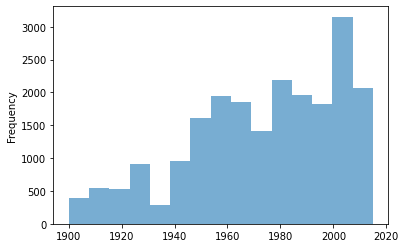

In [19]:
#9
#fig, ax = plt.subplots()
#ax.vlines(df['real_year'].mean(), 0,df['real_year'].size,colors = None)
df['real_year'].plot.hist(bins=15, alpha=0.6)

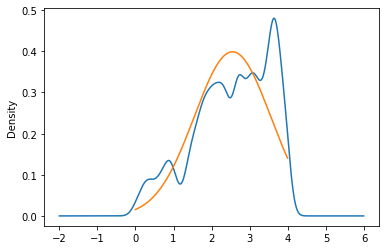

In [20]:
(normalized_df8['real_year'] -normalized_df8['real_year'].min()).plot.kde()
x = np.sort(normalized_df8['real_year']-normalized_df8['real_year'].min())
plt.plot(x, stats.norm.pdf(x,x.mean(),1))
plt.show()

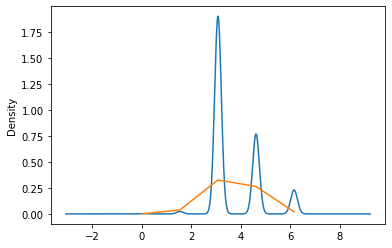

In [21]:
(normalized_df8['condition']-normalized_df8['condition'].min()).plot.kde()
x = np.sort(normalized_df8['condition']-normalized_df8['condition'].min())
plt.plot(x, stats.norm.pdf(x,x.mean(),1))
plt.show()

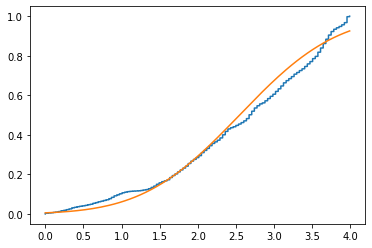

In [22]:
x = np.sort(normalized_df8['real_year']-normalized_df8['real_year'].min())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y)
plt.plot(x,stats.norm.cdf(x,x.mean(),1))
plt.show()

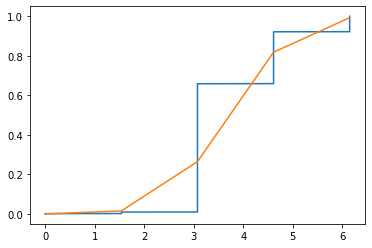

In [23]:
x = np.sort(normalized_df8['condition']-normalized_df8['condition'].min())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y)
plt.plot(x,stats.norm.cdf(x,x.mean(),1))
plt.show()

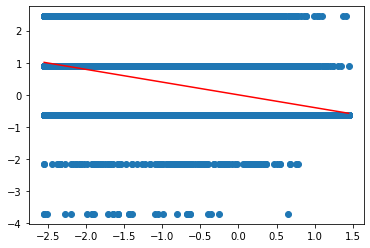

In [24]:
#10
X = normalized_df8['real_year'].values.reshape(-1, 1)  
Y = normalized_df8['condition'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()